In [14]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [2]:
# the data, split between train and validation sets
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

In [3]:
# represent the 28x28 images as a collection of unsigned 8-bit integer values between 0 and 255
#0 is black and 255 is white and all other values are in between 

x_train.shape
x_valid.shape
x_train.dtype
x_train.min()
x_train.max()
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

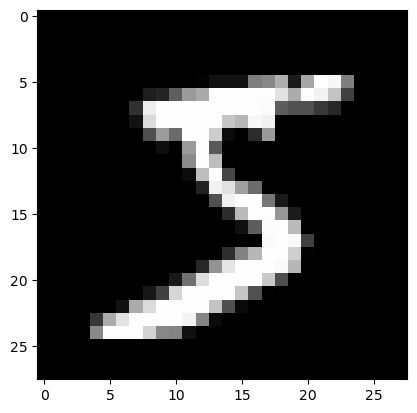

In [4]:
#renders one of the grayscale images in dataset

image = x_train[0]
plt.imshow(image, cmap='gray')

In [5]:
y_train[0]

5

In [6]:
#flattening image data using reshape method in order to simplify process

x_train = x_train.reshape(60000, 784)
x_valid = x_valid.reshape(10000, 784)

x_train.shape
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [10]:
# normalizing image data by converting integer values to floating point values between 0 and 1
x_train = x_train / 255
x_valid = x_valid / 255 

x_train.dtype

dtype('float64')

In [8]:
x_train.min()


0.0

In [9]:
x_train.max()

1.0

In [11]:
# categorically encoding the labels 
num_categories = 10

y_train = keras.utils.to_categorical(y_train, num_categories)
y_valid = keras.utils.to_categorical(y_valid, num_categories)

In [12]:
y_train[0:9]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [15]:
#instantiating model and creating input layer
model = Sequential()
model.add(Dense(units=512, activation='relu', input_shape=(784,)))

In [16]:
# creates hidden layer
model.add(Dense(units = 512, activation='relu'))

In [17]:
# creates output layer
model.add(Dense(units = 10, activation='softmax'))

In [18]:
# keras model method summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
# this cell compiles the model using a catergorical crossentropy loss function
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
#this cell trains the model with 5 epochs

history = model.fit(
    x_train, y_train, epochs=5, verbose=1, validation_data=(x_valid, y_valid)
)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5783 - accuracy: 0.8218 - val_loss: 0.3194 - val_accuracy: 0.9045
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2692 - accuracy: 0.9188 - val_loss: 0.2080 - val_accuracy: 0.9377
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1886 - accuracy: 0.9429 - val_loss: 0.1674 - val_accuracy: 0.9476
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1445 - accuracy: 0.9568 - val_loss: 0.1509 - val_accuracy: 0.9542
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1186 - accuracy: 0.9649 - val_loss: 0.1162 - val_accuracy: 0.9643


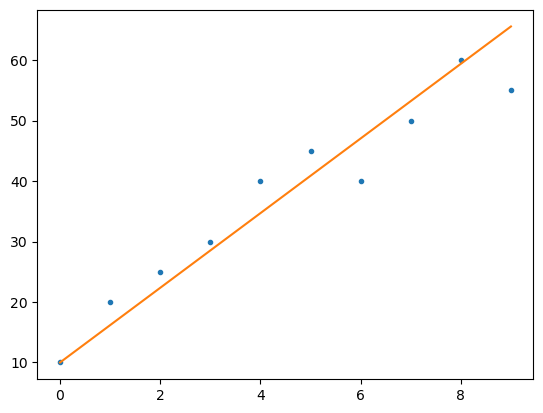

Loss: 24.12281249999997


In [21]:
#shows lowest possible loss

import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt

m = 6.175 
b = 10 

# Sample data
x = np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9])
y = np.array([10, 20, 25, 30, 40, 45, 40, 50, 60, 55])
y_hat = x * m + b

plt.plot(x, y, '.')
plt.plot(x, y_hat, '-')
plt.show()

print("Loss:", np.sum((y - y_hat)**2)/len(x))